In [1]:
# support vector machine using linear kernel

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

data = pd.read_csv('data/svm_linear.csv')
data.head()

,x1,x2,y
0,1,2,1
1,1,3,1
2,2,3,1
3,3,1,1
4,2,1,1


In [2]:
# create training data

x1 = data.iloc[:, 0].values.reshape(-1, 1)
x2 = data.iloc[:, 1].values.reshape(-1, 1)
X = np.concatenate((x1, x2), axis=1)
y = data.iloc[:, 2].values

In [10]:
# train linear model
svm_linear = SVC(kernel='linear', C=10)
svm_linear.fit(X, y)

# train gaussian model
svm_gaussian = SVC(kernel='rbf', C=10, gamma=1)
svm_gaussian.fit(X, y)

SVC(C=10, gamma=1)

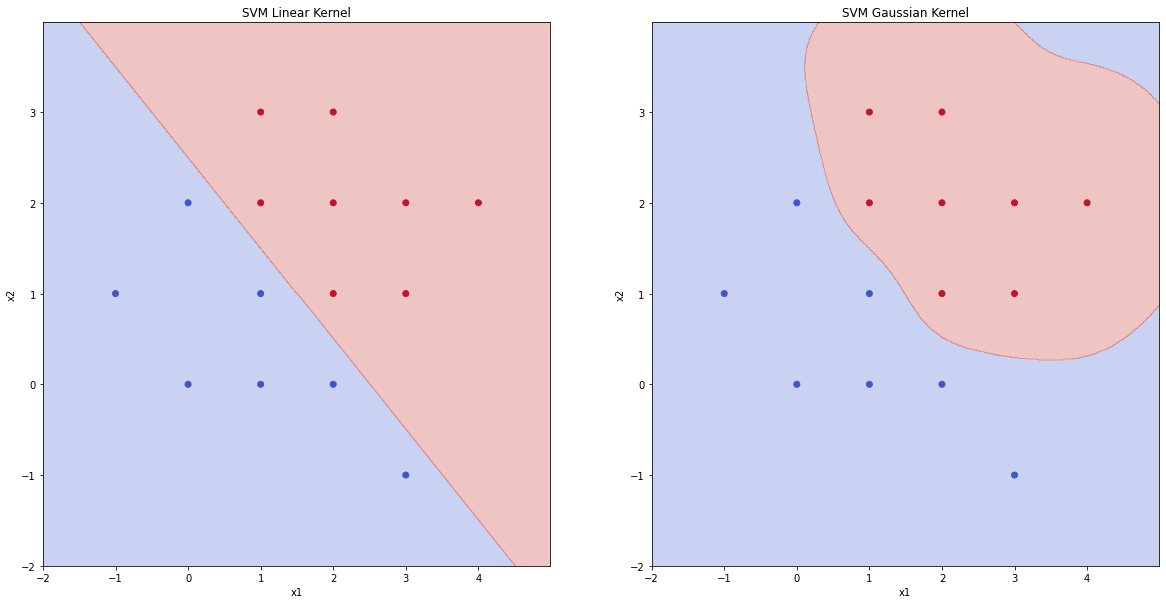

In [15]:
fig = plt.figure(figsize=(20, 10))
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))

# PLOT LINEAR KERNEL
ax1 = fig.add_subplot(121)
ax1.set_title('SVM Linear Kernel')
ax1.set_xlabel('x1')
ax1.set_ylabel('x2')
ax1.scatter(data.x1, data.x2, c=data.y, cmap='coolwarm')  # plot data points
Z = svm_linear.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
ax1.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')  # plot decision boundary

# PLOT GAUSSIAN KERNEL
ax2 = fig.add_subplot(122)
ax2.set_title('SVM Gaussian Kernel')
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.scatter(data.x1, data.x2, c=data.y, cmap='coolwarm')  # plot data points
Z = svm_gaussian.predict(np.c_[xx1.ravel(), xx2.ravel()]).reshape(xx1.shape)
ax2.contourf(xx1, xx2, Z, alpha=0.3, cmap='coolwarm')  # plot decision boundary

plt.show()